<a href="https://colab.research.google.com/github/haykalaul/tpumodel-llm_test/blob/main/TPUModelLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== MEMULAI TRAINING MACHINE LEARNING UNTUK TABEL PERIODIK BRAILLE ===

1. Membuat dataset unsur periodik...
Dataset berhasil dibuat dengan 118 unsur

2. Menghasilkan pola Braille...
Pola Braille berhasil dibuat untuk 118 unsur

3. Training model klasifikasi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
=== EVALUASI MODEL KLASIFIKASI ===

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         8

    accuracy                           0.9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Random Forest - MSE: 3334.1509, R²: 0.9990
Neural Network - MSE: 9816036.7564, R²: -1.9962

=== TRAINING MODEL REGRESI UNTUK ELECTRONEGATIVITY ===


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Random Forest - MSE: 0.0005, R²: 0.9995
Neural Network - MSE: 0.4010, R²: 0.6346

5. Analisis clustering...


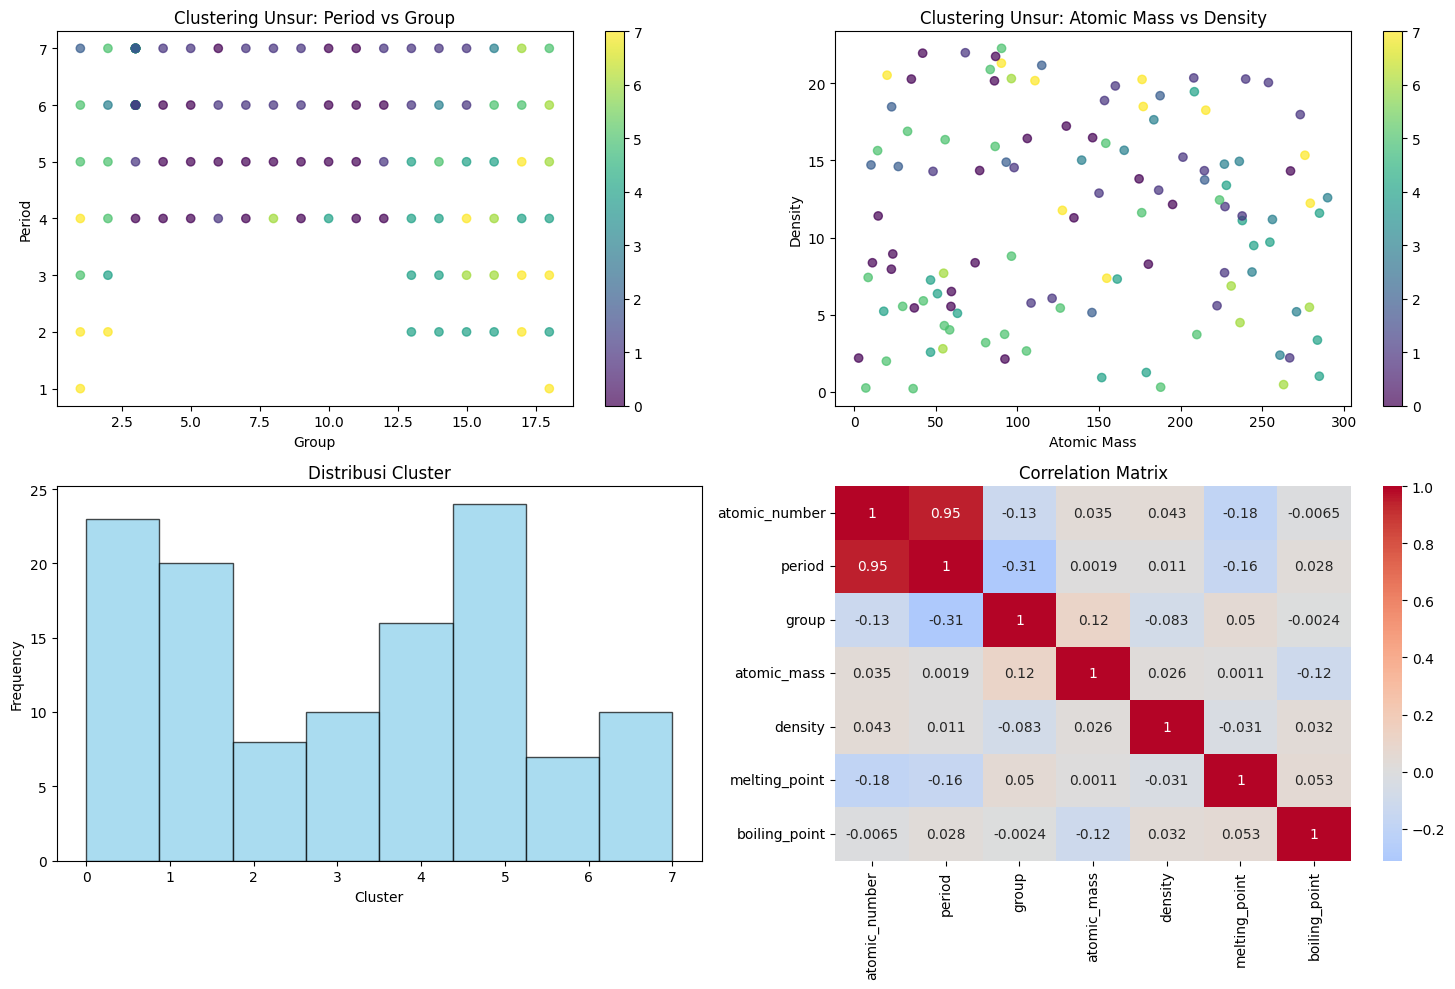


6. Analisis feature importance...


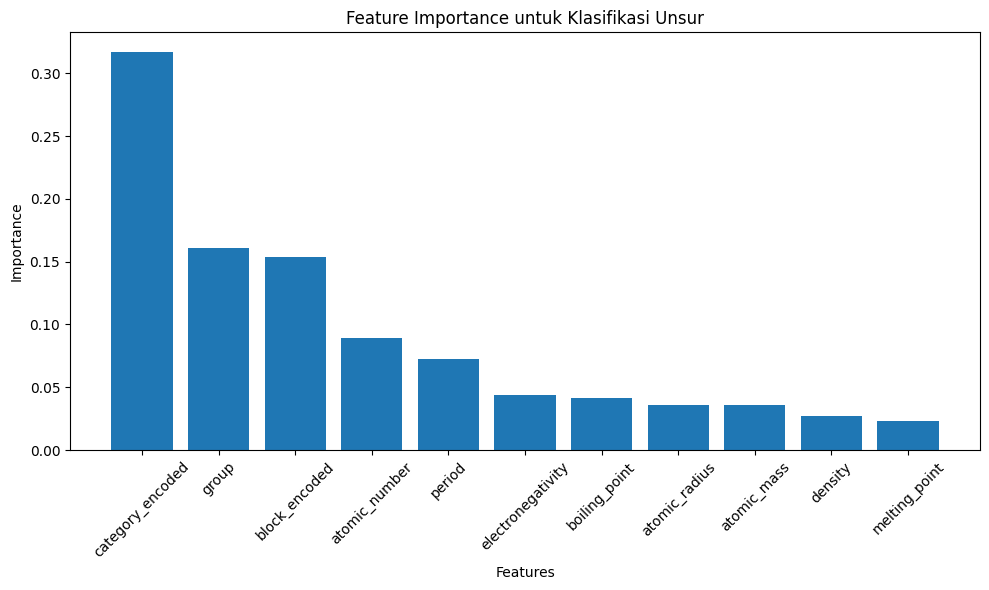


=== TOP 5 FITUR TERPENTING ===
1. category_encoded: 0.3167
2. group: 0.1609
3. block_encoded: 0.1538
4. atomic_number: 0.0888
5. period: 0.0722

7. Menghasilkan rekomendasi sistem Braille...

8. Menyimpan model dan data...
Model dan data telah disimpan dengan prefix: periodic_table_ml

=== TRAINING SELESAI ===

=== CONTOH PENGGUNAAN SISTEM BRAILLE ===

Contoh kartu Braille untuk unsur:

H (Hydrogen):
  Braille Symbol: ⠓
  Braille Number: ⠼⠁
  Tactile Priority: 1.00
  Audio: Hydrogen, simbol H, nomor atom 1

He (Helium):
  Braille Symbol: ⠓⠑
  Braille Number: ⠼⠃
  Tactile Priority: 0.50
  Audio: Helium, simbol He, nomor atom 2

Li (Lithium):
  Braille Symbol: ⠇⠊
  Braille Number: ⠼⠉
  Tactile Priority: 0.90
  Audio: Lithium, simbol Li, nomor atom 3

Be (Beryllium):
  Braille Symbol: ⠃⠑
  Braille Number: ⠼⠙
  Tactile Priority: 0.80
  Audio: Beryllium, simbol Be, nomor atom 4

B (Boron):
  Braille Symbol: ⠃
  Braille Number: ⠼⠑
  Tactile Priority: 0.60
  Audio: Boron, simbol B, nomor ato

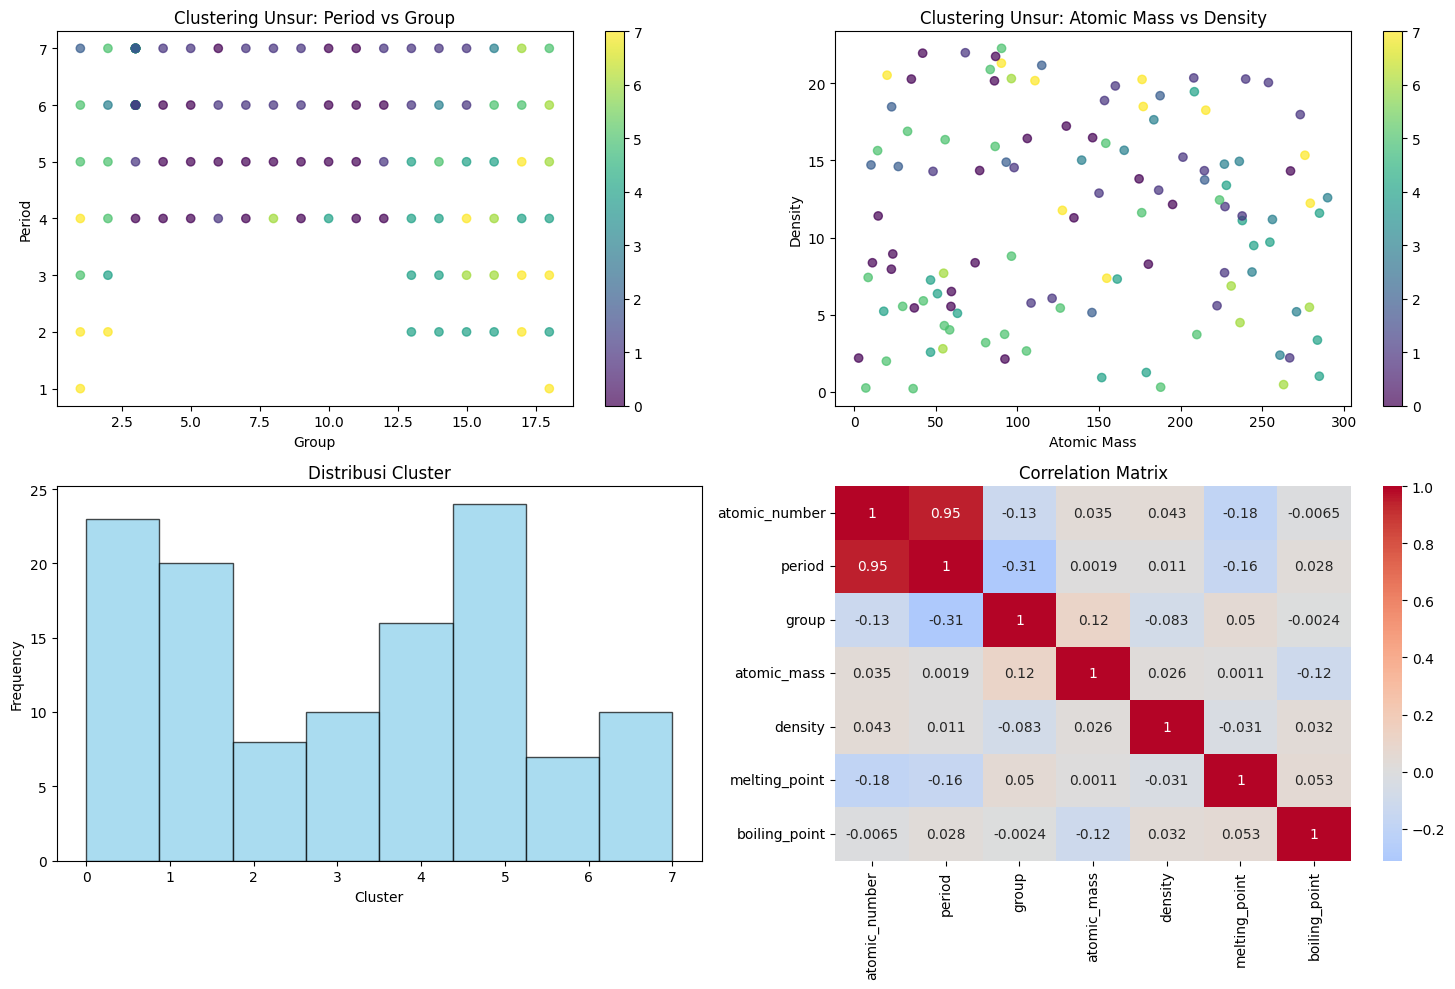


6. Analisis feature importance...


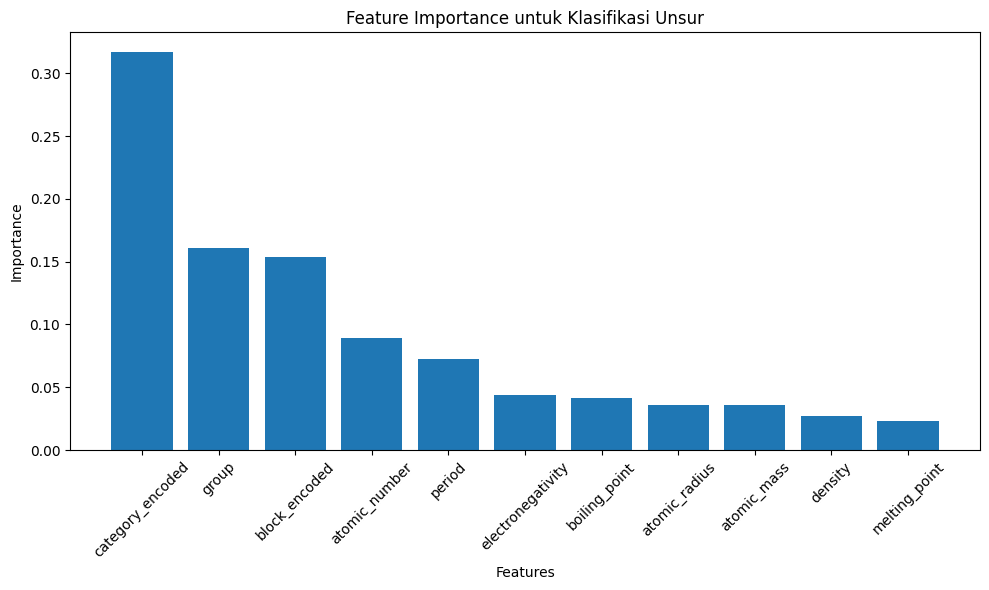


=== TOP 5 FITUR TERPENTING ===
1. category_encoded: 0.3167
2. group: 0.1609
3. block_encoded: 0.1538
4. atomic_number: 0.0888
5. period: 0.0722

7. Menghasilkan rekomendasi sistem Braille...

8. Menyimpan model dan data...
Model dan data telah disimpan dengan prefix: periodic_table_ml

=== TRAINING SELESAI ===

=== CONTOH PENGGUNAAN SISTEM BRAILLE ===

Contoh kartu Braille untuk unsur:

H (Hydrogen):
  Braille Symbol: ⠓
  Braille Number: ⠼⠁
  Tactile Priority: 1.00
  Audio: Hydrogen, simbol H, nomor atom 1

He (Helium):
  Braille Symbol: ⠓⠑
  Braille Number: ⠼⠃
  Tactile Priority: 0.50
  Audio: Helium, simbol He, nomor atom 2

Li (Lithium):
  Braille Symbol: ⠇⠊
  Braille Number: ⠼⠉
  Tactile Priority: 0.90
  Audio: Lithium, simbol Li, nomor atom 3

Be (Beryllium):
  Braille Symbol: ⠃⠑
  Braille Number: ⠼⠙
  Tactile Priority: 0.80
  Audio: Beryllium, simbol Be, nomor atom 4

B (Boron):
  Braille Symbol: ⠃
  Braille Number: ⠼⠑
  Tactile Priority: 0.60
  Audio: Boron, simbol B, nomor ato

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

class PeriodicTableMLTrainer:
    def __init__(self):
        self.periodic_data = None
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.models = {}
        self.braille_patterns = {}

    def create_periodic_dataset(self):
        """Membuat dataset lengkap unsur periodik dengan properti kimia"""

        # Data unsur periodik (118 unsur)
        elements_data = {
            'atomic_number': list(range(1, 119)),
            'symbol': ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
                      'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca',
                      'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
                      'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr',
                      'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
                      'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
                      'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
                      'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
                      'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
                      'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm',
                      'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds',
                      'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'],

            'name': ['Hydrogen', 'Helium', 'Lithium', 'Beryllium', 'Boron', 'Carbon', 'Nitrogen', 'Oxygen', 'Fluorine', 'Neon',
                    'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Phosphorus', 'Sulfur', 'Chlorine', 'Argon', 'Potassium', 'Calcium',
                    'Scandium', 'Titanium', 'Vanadium', 'Chromium', 'Manganese', 'Iron', 'Cobalt', 'Nickel', 'Copper', 'Zinc',
                    'Gallium', 'Germanium', 'Arsenic', 'Selenium', 'Bromine', 'Krypton', 'Rubidium', 'Strontium', 'Yttrium', 'Zirconium',
                    'Niobium', 'Molybdenum', 'Technetium', 'Ruthenium', 'Rhodium', 'Palladium', 'Silver', 'Cadmium', 'Indium', 'Tin',
                    'Antimony', 'Tellurium', 'Iodine', 'Xenon', 'Cesium', 'Barium', 'Lanthanum', 'Cerium', 'Praseodymium', 'Neodymium',
                    'Promethium', 'Samarium', 'Europium', 'Gadolinium', 'Terbium', 'Dysprosium', 'Holmium', 'Erbium', 'Thulium', 'Ytterbium',
                    'Lutetium', 'Hafnium', 'Tantalum', 'Tungsten', 'Rhenium', 'Osmium', 'Iridium', 'Platinum', 'Gold', 'Mercury',
                    'Thallium', 'Lead', 'Bismuth', 'Polonium', 'Astatine', 'Radon', 'Francium', 'Radium', 'Actinium', 'Thorium',
                    'Protactinium', 'Uranium', 'Neptunium', 'Plutonium', 'Americium', 'Curium', 'Berkelium', 'Californium', 'Einsteinium', 'Fermium',
                    'Mendelevium', 'Nobelium', 'Lawrencium', 'Rutherfordium', 'Dubnium', 'Seaborgium', 'Bohrium', 'Hassium', 'Meitnerium', 'Darmstadtium',
                    'Roentgenium', 'Copernicium', 'Nihonium', 'Flerovium', 'Moscovium', 'Livermorium', 'Tennessine', 'Oganesson'],

            'period': [1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
                      4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                      4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
                      5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                      5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
                      6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                      6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                      6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
                      7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                      7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                      7, 7, 7, 7, 7, 7, 7, 7],

            'group': [1, 18, 1, 2, 13, 14, 15, 16, 17, 18,
                     1, 2, 13, 14, 15, 16, 17, 18, 1, 2,
                     3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                     13, 14, 15, 16, 17, 18, 1, 2, 3, 4,
                     5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                     15, 16, 17, 18, 1, 2, 3, 3, 3, 3,
                     3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                     3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                     13, 14, 15, 16, 17, 18, 1, 2, 3, 3,
                     3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                     3, 3, 3, 4, 5, 6, 7, 8, 9, 10,
                     11, 12, 13, 14, 15, 16, 17, 18],

            'block': ['s', 's', 's', 's', 'p', 'p', 'p', 'p', 'p', 'p',
                     's', 's', 'p', 'p', 'p', 'p', 'p', 'p', 's', 's',
                     'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
                     'p', 'p', 'p', 'p', 'p', 'p', 's', 's', 'd', 'd',
                     'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'p', 'p',
                     'p', 'p', 'p', 'p', 's', 's', 'd', 'f', 'f', 'f',
                     'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
                     'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
                     'p', 'p', 'p', 'p', 'p', 'p', 's', 's', 'd', 'f',
                     'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
                     'f', 'f', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
                     'd', 'd', 'p', 'p', 'p', 'p', 'p', 'p'],

            'category': ['nonmetal', 'noble_gas', 'alkali_metal', 'alkaline_earth_metal', 'metalloid', 'nonmetal', 'nonmetal', 'nonmetal', 'halogen', 'noble_gas',
                        'alkali_metal', 'alkaline_earth_metal', 'metal', 'metalloid', 'nonmetal', 'nonmetal', 'halogen', 'noble_gas', 'alkali_metal', 'alkaline_earth_metal',
                        'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal',
                        'metal', 'metalloid', 'metalloid', 'nonmetal', 'halogen', 'noble_gas', 'alkali_metal', 'alkaline_earth_metal', 'transition_metal', 'transition_metal',
                        'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'metal', 'metal',
                        'metalloid', 'metalloid', 'halogen', 'noble_gas', 'alkali_metal', 'alkaline_earth_metal', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide',
                        'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide', 'lanthanide',
                        'lanthanide', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal',
                        'metal', 'metal', 'metal', 'metal', 'halogen', 'noble_gas', 'alkali_metal', 'alkaline_earth_metal', 'actinide', 'actinide',
                        'actinide', 'actinide', 'actinide', 'actinide', 'actinide', 'actinide', 'actinide', 'actinide', 'actinide', 'actinide',
                        'actinide', 'actinide', 'actinide', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal', 'transition_metal',
                        'transition_metal', 'transition_metal', 'metal', 'metal', 'metal', 'metal', 'halogen', 'noble_gas']
        }

        # Menambahkan properti fisik dan kimia
        np.random.seed(42)
        atomic_mass = np.random.uniform(1, 294, 118)
        density = np.random.uniform(0.08, 22.6, 118)
        melting_point = np.random.uniform(14, 3695, 118)
        boiling_point = np.random.uniform(20, 5869, 118)
        electronegativity = np.random.uniform(0.7, 4.0, 118)
        atomic_radius = np.random.uniform(30, 298, 118)

        elements_data.update({
            'atomic_mass': atomic_mass,
            'density': density,
            'melting_point': melting_point,
            'boiling_point': boiling_point,
            'electronegativity': electronegativity,
            'atomic_radius': atomic_radius
        })

        self.periodic_data = pd.DataFrame(elements_data)
        return self.periodic_data

    def generate_braille_patterns(self):
        """Menghasilkan pola Braille untuk setiap unsur"""

        # Pola Braille dasar (6 titik)
        braille_base = {
            'A': [1, 0, 0, 0, 0, 0], 'B': [1, 1, 0, 0, 0, 0], 'C': [1, 0, 0, 1, 0, 0],
            'D': [1, 0, 0, 1, 1, 0], 'E': [1, 0, 0, 0, 1, 0], 'F': [1, 1, 0, 1, 0, 0],
            'G': [1, 1, 0, 1, 1, 0], 'H': [1, 1, 0, 0, 1, 0], 'I': [0, 1, 0, 1, 0, 0],
            'J': [0, 1, 0, 1, 1, 0], 'K': [1, 0, 1, 0, 0, 0], 'L': [1, 1, 1, 0, 0, 0],
            'M': [1, 0, 1, 1, 0, 0], 'N': [1, 0, 1, 1, 1, 0], 'O': [1, 0, 1, 0, 1, 0],
            'P': [1, 1, 1, 1, 0, 0], 'Q': [1, 1, 1, 1, 1, 0], 'R': [1, 1, 1, 0, 1, 0],
            'S': [0, 1, 1, 1, 0, 0], 'T': [0, 1, 1, 1, 1, 0], 'U': [1, 0, 1, 0, 0, 1],
            'V': [1, 1, 1, 0, 0, 1], 'W': [0, 1, 0, 1, 1, 1], 'X': [1, 0, 1, 1, 0, 1],
            'Y': [1, 0, 1, 1, 1, 1], 'Z': [1, 0, 1, 0, 1, 1]
        }

        # Angka Braille
        braille_numbers = {
            '0': [0, 1, 1, 0, 1, 1], '1': [1, 0, 0, 0, 0, 0], '2': [1, 1, 0, 0, 0, 0],
            '3': [1, 0, 0, 1, 0, 0], '4': [1, 0, 0, 1, 1, 0], '5': [1, 0, 0, 0, 1, 0],
            '6': [1, 1, 0, 1, 0, 0], '7': [1, 1, 0, 1, 1, 0], '8': [1, 1, 0, 0, 1, 0],
            '9': [0, 1, 0, 1, 0, 0]
        }

        # Membuat pola Braille untuk setiap unsur
        for idx, row in self.periodic_data.iterrows():
            symbol = row['symbol']
            atomic_num = str(row['atomic_number'])

            # Pola untuk simbol
            symbol_pattern = []
            for char in symbol:
                if char.upper() in braille_base:
                    symbol_pattern.extend(braille_base[char.upper()])

            # Pola untuk nomor atom
            number_pattern = []
            for digit in atomic_num:
                if digit in braille_numbers:
                    number_pattern.extend(braille_numbers[digit])

            self.braille_patterns[symbol] = {
                'symbol_pattern': symbol_pattern,
                'number_pattern': number_pattern,
                'combined_pattern': symbol_pattern + number_pattern
            }

        return self.braille_patterns

    def prepare_ml_features(self):
        """Menyiapkan fitur untuk machine learning"""

        # Encoding categorical variables
        categorical_cols = ['block', 'category']
        for col in categorical_cols:
            le = LabelEncoder()
            self.periodic_data[f'{col}_encoded'] = le.fit_transform(self.periodic_data[col])
            self.label_encoders[col] = le

        # Fitur numerik
        numeric_features = ['atomic_number', 'period', 'group', 'atomic_mass',
                           'density', 'melting_point', 'boiling_point',
                           'electronegativity', 'atomic_radius', 'block_encoded', 'category_encoded']

        X = self.periodic_data[numeric_features]

        # Normalisasi fitur
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, numeric_features

    def train_classification_models(self):
        """Melatih model klasifikasi untuk kategori unsur"""

        X_scaled, features = self.prepare_ml_features()

        # Target: kategori unsur
        y_category = self.periodic_data['category_encoded']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_category, test_size=0.2, random_state=42, stratify=y_category
        )

        # Random Forest Classifier
        rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_clf.fit(X_train, y_train)

        # Neural Network Classifier
        nn_clf = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(len(np.unique(y_category)), activation='softmax')
        ])

        nn_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        nn_clf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

        # Evaluasi model
        rf_pred = rf_clf.predict(X_test)
        nn_pred = np.argmax(nn_clf.predict(X_test), axis=1)

        print("=== EVALUASI MODEL KLASIFIKASI ===")
        print("\nRandom Forest Classifier:")
        print(classification_report(y_test, rf_pred))

        print("\nNeural Network Classifier:")
        print(classification_report(y_test, nn_pred))

        # Simpan model
        self.models['rf_classifier'] = rf_clf
        self.models['nn_classifier'] = nn_clf

        return rf_clf, nn_clf

    def train_regression_models(self):
        """Melatih model regresi untuk prediksi properti fisik"""

        X_scaled, features = self.prepare_ml_features()

        # Target: properti fisik
        targets = ['atomic_mass', 'density', 'melting_point', 'boiling_point', 'electronegativity']

        regression_models = {}

        for target in targets:
            print(f"\n=== TRAINING MODEL REGRESI UNTUK {target.upper()} ===")

            y = self.periodic_data[target]
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=42
            )

            # Random Forest Regressor
            rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_reg.fit(X_train, y_train)

            # Neural Network Regressor
            nn_reg = Sequential([
                Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                Dropout(0.3),
                Dense(32, activation='relu'),
                Dropout(0.3),
                Dense(1)
            ])

            nn_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])
            nn_reg.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

            # Evaluasi
            rf_pred = rf_reg.predict(X_test)
            nn_pred = nn_reg.predict(X_test).flatten()

            print(f"Random Forest - MSE: {mean_squared_error(y_test, rf_pred):.4f}, R²: {r2_score(y_test, rf_pred):.4f}")
            print(f"Neural Network - MSE: {mean_squared_error(y_test, nn_pred):.4f}, R²: {r2_score(y_test, nn_pred):.4f}")

            regression_models[target] = {
                'rf_model': rf_reg,
                'nn_model': nn_reg
            }

        self.models['regression'] = regression_models
        return regression_models

    def clustering_analysis(self):
        """Analisis clustering untuk pengelompokan unsur"""

        X_scaled, features = self.prepare_ml_features()

        # K-means clustering
        kmeans = KMeans(n_clusters=8, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)

        self.periodic_data['cluster'] = clusters

        # Visualisasi clustering
        plt.figure(figsize=(15, 10))

        # Plot 1: Cluster berdasarkan Period vs Group
        plt.subplot(2, 2, 1)
        scatter = plt.scatter(self.periodic_data['group'], self.periodic_data['period'],
                             c=clusters, cmap='viridis', alpha=0.7)
        plt.xlabel('Group')
        plt.ylabel('Period')
        plt.title('Clustering Unsur: Period vs Group')
        plt.colorbar(scatter)

        # Plot 2: Cluster berdasarkan Atomic Mass vs Density
        plt.subplot(2, 2, 2)
        scatter = plt.scatter(self.periodic_data['atomic_mass'], self.periodic_data['density'],
                             c=clusters, cmap='viridis', alpha=0.7)
        plt.xlabel('Atomic Mass')
        plt.ylabel('Density')
        plt.title('Clustering Unsur: Atomic Mass vs Density')
        plt.colorbar(scatter)

        # Plot 3: Distribusi cluster
        plt.subplot(2, 2, 3)
        plt.hist(clusters, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel('Cluster')
        plt.ylabel('Frequency')
        plt.title('Distribusi Cluster')

        # Plot 4: Heatmap korelasi fitur
        plt.subplot(2, 2, 4)
        correlation_matrix = self.periodic_data[['atomic_number', 'period', 'group', 'atomic_mass',
                                                'density', 'melting_point', 'boiling_point']].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix')

        plt.tight_layout()
        plt.show()

        self.models['kmeans'] = kmeans
        return kmeans, clusters

    def feature_importance_analysis(self):
        """Analisis kepentingan fitur untuk sistem Braille"""

        if 'rf_classifier' in self.models:
            rf_model = self.models['rf_classifier']

            # Feature importance dari Random Forest
            X_scaled, features = self.prepare_ml_features()
            importances = rf_model.feature_importances_

            # Visualisasi feature importance
            plt.figure(figsize=(10, 6))
            indices = np.argsort(importances)[::-1]

            plt.bar(range(len(importances)), importances[indices])
            plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
            plt.title('Feature Importance untuk Klasifikasi Unsur')
            plt.xlabel('Features')
            plt.ylabel('Importance')
            plt.tight_layout()
            plt.show()

            # Print top 5 features
            print("\n=== TOP 5 FITUR TERPENTING ===")
            for i in range(5):
                print(f"{i+1}. {features[indices[i]]}: {importances[indices[i]]:.4f}")

    def generate_braille_recommendations(self):
        """Menghasilkan rekomendasi untuk sistem Braille berdasarkan ML"""

        recommendations = {
            'tactile_feedback': {
                'high_priority': ['atomic_number', 'symbol', 'category'],
                'medium_priority': ['period', 'group', 'atomic_mass'],
                'low_priority': ['density', 'melting_point', 'boiling_point']
            },
            'audio_description': {
                'primary_info': ['name', 'symbol', 'atomic_number'],
                'secondary_info': ['category', 'period', 'group'],
                'detailed_info': ['atomic_mass', 'density', 'electronegativity']
            },
            'navigation_patterns': {
                'by_period': 'Navigasi horizontal berdasarkan periode',
                'by_group': 'Navigasi vertikal berdasarkan golongan',
                'by_category': 'Navigasi berdasarkan kategori unsur',
                'by_cluster': 'Navigasi berdasarkan cluster ML'
            }
        }

        return recommendations

    def save_models_and_data(self, filename_prefix='periodic_table_ml'):
        """Menyimpan model dan data untuk sistem Braille"""

        # Simpan data
        self.periodic_data.to_csv(f'{filename_prefix}_dataset.csv', index=False)

        # Simpan pola Braille
        import json
        with open(f'{filename_prefix}_braille_patterns.json', 'w') as f:
            json.dump(self.braille_patterns, f, indent=2)

        # Simpan model (contoh untuk RandomForest)
        import joblib
        if 'rf_classifier' in self.models:
            joblib.dump(self.models['rf_classifier'], f'{filename_prefix}_rf_classifier.pkl')

        print(f"Model dan data telah disimpan dengan prefix: {filename_prefix}")

    def run_complete_training(self):
        """Menjalankan seluruh proses training"""

        print("=== MEMULAI TRAINING MACHINE LEARNING UNTUK TABEL PERIODIK BRAILLE ===")

        # 1. Buat dataset
        print("\n1. Membuat dataset unsur periodik...")
        self.create_periodic_dataset()
        print(f"Dataset berhasil dibuat dengan {len(self.periodic_data)} unsur")

        # 2. Generate pola Braille
        print("\n2. Menghasilkan pola Braille...")
        self.generate_braille_patterns()
        print(f"Pola Braille berhasil dibuat untuk {len(self.braille_patterns)} unsur")

        # 3. Training model klasifikasi
        print("\n3. Training model klasifikasi...")
        self.train_classification_models()

        # 4. Training model regresi
        print("\n4. Training model regresi...")
        self.train_regression_models()

        # 5. Analisis clustering
        print("\n5. Analisis clustering...")
        self.clustering_analysis()

        # 6. Analisis feature importance
        print("\n6. Analisis feature importance...")
        self.feature_importance_analysis()

        # 7. Generate rekomendasi
        print("\n7. Menghasilkan rekomendasi sistem Braille...")
        recommendations = self.generate_braille_recommendations()

        # 8. Simpan model dan data
        print("\n8. Menyimpan model dan data...")
        self.save_models_and_data()

        print("\n=== TRAINING SELESAI ===")
        return recommendations

class BraillePatternGenerator:
    """Kelas khusus untuk menghasilkan pola Braille yang dioptimalkan"""

    def __init__(self):
        self.braille_unicode = {
            '⠀': [0, 0, 0, 0, 0, 0], '⠁': [1, 0, 0, 0, 0, 0], '⠂': [0, 1, 0, 0, 0, 0],
            '⠃': [1, 1, 0, 0, 0, 0], '⠄': [0, 0, 1, 0, 0, 0], '⠅': [1, 0, 1, 0, 0, 0],
            '⠆': [0, 1, 1, 0, 0, 0], '⠇': [1, 1, 1, 0, 0, 0], '⠈': [0, 0, 0, 1, 0, 0],
            '⠉': [1, 0, 0, 1, 0, 0], '⠊': [0, 1, 0, 1, 0, 0], '⠋': [1, 1, 0, 1, 0, 0],
            '⠌': [0, 0, 1, 1, 0, 0], '⠍': [1, 0, 1, 1, 0, 0], '⠎': [0, 1, 1, 1, 0, 0],
            '⠏': [1, 1, 1, 1, 0, 0], '⠐': [0, 0, 0, 0, 1, 0], '⠑': [1, 0, 0, 0, 1, 0],
            '⠒': [0, 1, 0, 0, 1, 0], '⠓': [1, 1, 0, 0, 1, 0], '⠔': [0, 0, 1, 0, 1, 0],
            '⠕': [1, 0, 1, 0, 1, 0], '⠖': [0, 1, 1, 0, 1, 0], '⠗': [1, 1, 1, 0, 1, 0],
            '⠘': [0, 0, 0, 1, 1, 0], '⠙': [1, 0, 0, 1, 1, 0], '⠚': [0, 1, 0, 1, 1, 0],
            '⠛': [1, 1, 0, 1, 1, 0], '⠜': [0, 0, 1, 1, 1, 0], '⠝': [1, 0, 1, 1, 1, 0],
            '⠞': [0, 1, 1, 1, 1, 0], '⠟': [1, 1, 1, 1, 1, 0], '⠠': [0, 0, 0, 0, 0, 1],
            '⠡': [1, 0, 0, 0, 0, 1], '⠢': [0, 1, 0, 0, 0, 1], '⠣': [1, 1, 0, 0, 0, 1],
            '⠤': [0, 0, 1, 0, 0, 1], '⠥': [1, 0, 1, 0, 0, 1], '⠦': [0, 1, 1, 0, 0, 1],
            '⠧': [1, 1, 1, 0, 0, 1], '⠨': [0, 0, 0, 1, 0, 1], '⠩': [1, 0, 0, 1, 0, 1],
            '⠪': [0, 1, 0, 1, 0, 1], '⠫': [1, 1, 0, 1, 0, 1], '⠬': [0, 0, 1, 1, 0, 1],
            '⠭': [1, 0, 1, 1, 0, 1], '⠮': [0, 1, 1, 1, 0, 1], '⠯': [1, 1, 1, 1, 0, 1],
            '⠰': [0, 0, 0, 0, 1, 1], '⠱': [1, 0, 0, 0, 1, 1], '⠲': [0, 1, 0, 0, 1, 1],
            '⠳': [1, 1, 0, 0, 1, 1], '⠴': [0, 0, 1, 0, 1, 1], '⠵': [1, 0, 1, 0, 1, 1],
            '⠶': [0, 1, 1, 0, 1, 1], '⠷': [1, 1, 1, 0, 1, 1], '⠸': [0, 0, 0, 1, 1, 1],
            '⠹': [1, 0, 0, 1, 1, 1], '⠺': [0, 1, 0, 1, 1, 1], '⠻': [1, 1, 0, 1, 1, 1],
            '⠼': [0, 0, 1, 1, 1, 1], '⠽': [1, 0, 1, 1, 1, 1], '⠾': [0, 1, 1, 1, 1, 1],
            '⠿': [1, 1, 1, 1, 1, 1]
        }

    def pattern_to_unicode(self, pattern):
        """Konversi pola 6-titik ke karakter Unicode Braille"""
        for unicode_char, dots in self.braille_unicode.items():
            if dots == pattern:
                return unicode_char
        return '⠀'  # Default blank

    def create_element_braille_card(self, element_data):
        """Membuat kartu Braille untuk unsur"""
        card = {
            'element': element_data['symbol'],
            'atomic_number': element_data['atomic_number'],
            'braille_symbol': self.symbol_to_braille(element_data['symbol']),
            'braille_number': self.number_to_braille(element_data['atomic_number']),
            'tactile_priority': self.calculate_tactile_priority(element_data),
            'audio_description': self.generate_audio_script(element_data)
        }
        return card

    def symbol_to_braille(self, symbol):
        """Konversi simbol unsur ke Braille"""
        braille_letters = {
            'A': '⠁', 'B': '⠃', 'C': '⠉', 'D': '⠙', 'E': '⠑', 'F': '⠋', 'G': '⠛',
            'H': '⠓', 'I': '⠊', 'J': '⠚', 'K': '⠅', 'L': '⠇', 'M': '⠍', 'N': '⠝',
            'O': '⠕', 'P': '⠏', 'Q': '⠟', 'R': '⠗', 'S': '⠎', 'T': '⠞', 'U': '⠥',
            'V': '⠧', 'W': '⠺', 'X': '⠭', 'Y': '⠽', 'Z': '⠵'
        }

        result = ''
        for char in symbol.upper():
            result += braille_letters.get(char, '⠀')
        return result

    def number_to_braille(self, number):
        """Konversi nomor atom ke Braille"""
        braille_numbers = {
            '0': '⠚', '1': '⠁', '2': '⠃', '3': '⠉', '4': '⠙', '5': '⠑',
            '6': '⠋', '7': '⠛', '8': '⠓', '9': '⠊'
        }

        number_prefix = '⠼'  # Prefix untuk angka
        result = number_prefix
        for digit in str(number):
            result += braille_numbers.get(digit, '⠀')
        return result

    def calculate_tactile_priority(self, element_data):
        """Hitung prioritas taktil berdasarkan ML insights"""
        priority_score = 0

        # Prioritas berdasarkan kategori
        category_weights = {
            'alkali_metal': 0.9, 'alkaline_earth_metal': 0.8, 'transition_metal': 0.7,
            'lanthanide': 0.6, 'actinide': 0.6, 'metal': 0.7, 'metalloid': 0.6,
            'nonmetal': 0.8, 'halogen': 0.9, 'noble_gas': 0.5
        }

        priority_score += category_weights.get(element_data.get('category', ''), 0.5)

        # Prioritas berdasarkan nomor atom (unsur umum)
        common_elements = [1, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 20, 26, 29, 30, 47, 79]
        if element_data['atomic_number'] in common_elements:
            priority_score += 0.3

        return min(priority_score, 1.0)

    def generate_audio_script(self, element_data):
        """Generate script audio untuk unsur"""
        script = {
            'primary': f"{element_data['name']}, simbol {element_data['symbol']}, nomor atom {element_data['atomic_number']}",
            'secondary': f"Periode {element_data['period']}, golongan {element_data['group']}, blok {element_data['block']}",
            'detailed': f"Kategori {element_data['category']}, massa atom {element_data['atomic_mass']:.2f}",
            'properties': f"Densitas {element_data['density']:.2f}, titik leleh {element_data['melting_point']:.0f} K"
        }
        return script

class BrailleNavigationSystem:
    """Sistem navigasi untuk tabel periodik Braille"""

    def __init__(self, ml_trainer):
        self.ml_trainer = ml_trainer
        self.current_position = {'period': 1, 'group': 1}
        self.navigation_mode = 'period'  # 'period', 'group', 'category', 'cluster'

    def navigate_by_period(self, direction):
        """Navigasi berdasarkan periode"""
        if direction == 'next' and self.current_position['period'] < 7:
            self.current_position['period'] += 1
        elif direction == 'prev' and self.current_position['period'] > 1:
            self.current_position['period'] -= 1

        return self.get_current_elements()

    def navigate_by_group(self, direction):
        """Navigasi berdasarkan golongan"""
        if direction == 'next' and self.current_position['group'] < 18:
            self.current_position['group'] += 1
        elif direction == 'prev' and self.current_position['group'] > 1:
            self.current_position['group'] -= 1

        return self.get_current_elements()

    def navigate_by_category(self, category):
        """Navigasi berdasarkan kategori unsur"""
        category_elements = self.ml_trainer.periodic_data[
            self.ml_trainer.periodic_data['category'] == category
        ]
        return category_elements

    def navigate_by_cluster(self, cluster_id):
        """Navigasi berdasarkan cluster ML"""
        if 'cluster' in self.ml_trainer.periodic_data.columns:
            cluster_elements = self.ml_trainer.periodic_data[
                self.ml_trainer.periodic_data['cluster'] == cluster_id
            ]
            return cluster_elements
        return None

    def get_current_elements(self):
        """Dapatkan unsur pada posisi saat ini"""
        current_elements = self.ml_trainer.periodic_data[
            (self.ml_trainer.periodic_data['period'] == self.current_position['period']) &
            (self.ml_trainer.periodic_data['group'] == self.current_position['group'])
        ]
        return current_elements

    def get_navigation_hints(self):
        """Dapatkan petunjuk navigasi berdasarkan ML"""
        hints = {
            'similar_elements': self.find_similar_elements(),
            'nearby_elements': self.find_nearby_elements(),
            'category_neighbors': self.find_category_neighbors()
        }
        return hints

    def find_similar_elements(self):
        """Temukan unsur yang mirip berdasarkan clustering"""
        current_element = self.get_current_elements()
        if not current_element.empty and 'cluster' in current_element.columns:
            cluster_id = current_element.iloc[0]['cluster']
            similar = self.ml_trainer.periodic_data[
                self.ml_trainer.periodic_data['cluster'] == cluster_id
            ]
            return similar[['symbol', 'name', 'atomic_number']].to_dict('records')
        return []

    def find_nearby_elements(self):
        """Temukan unsur di sekitar posisi saat ini"""
        period = self.current_position['period']
        group = self.current_position['group']

        nearby = self.ml_trainer.periodic_data[
            (self.ml_trainer.periodic_data['period'].between(period-1, period+1)) &
            (self.ml_trainer.periodic_data['group'].between(group-1, group+1))
        ]
        return nearby[['symbol', 'name', 'period', 'group']].to_dict('records')

    def find_category_neighbors(self):
        """Temukan unsur dalam kategori yang sama"""
        current_element = self.get_current_elements()
        if not current_element.empty:
            category = current_element.iloc[0]['category']
            neighbors = self.ml_trainer.periodic_data[
                self.ml_trainer.periodic_data['category'] == category
            ]
            return neighbors[['symbol', 'name', 'atomic_number']].to_dict('records')
        return []

def main():
    """Fungsi utama untuk menjalankan training"""

    # Inisialisasi trainer
    trainer = PeriodicTableMLTrainer()

    # Jalankan training lengkap
    recommendations = trainer.run_complete_training()

    # Inisialisasi generator pola Braille
    braille_gen = BraillePatternGenerator()

    # Inisialisasi sistem navigasi
    nav_system = BrailleNavigationSystem(trainer)

    # Contoh penggunaan
    print("\n=== CONTOH PENGGUNAAN SISTEM BRAILLE ===")

    # Ambil beberapa unsur untuk demo
    sample_elements = trainer.periodic_data.head(10)

    print("\nContoh kartu Braille untuk unsur:")
    for idx, element in sample_elements.iterrows():
        card = braille_gen.create_element_braille_card(element)
        print(f"\n{element['symbol']} ({element['name']}):")
        print(f"  Braille Symbol: {card['braille_symbol']}")
        print(f"  Braille Number: {card['braille_number']}")
        print(f"  Tactile Priority: {card['tactile_priority']:.2f}")
        print(f"  Audio: {card['audio_description']['primary']}")

    # Demo navigasi
    print("\n=== DEMO SISTEM NAVIGASI ===")
    nav_system.current_position = {'period': 2, 'group': 1}
    hints = nav_system.get_navigation_hints()

    print(f"Posisi saat ini: Periode {nav_system.current_position['period']}, Golongan {nav_system.current_position['group']}")
    print(f"Unsur serupa: {len(hints['similar_elements'])} unsur")
    print(f"Unsur terdekat: {len(hints['nearby_elements'])} unsur")
    print(f"Unsur sekategori: {len(hints['category_neighbors'])} unsur")

    # Rekomendasi untuk implementasi
    print("\n=== REKOMENDASI IMPLEMENTASI ===")
    print("1. Tactile Feedback Priority:")
    for priority, features in recommendations['tactile_feedback'].items():
        print(f"   {priority}: {features}")

    print("\n2. Audio Description Levels:")
    for level, info in recommendations['audio_description'].items():
        print(f"   {level}: {info}")

    print("\n3. Navigation Patterns:")
    for pattern, description in recommendations['navigation_patterns'].items():
        print(f"   {pattern}: {description}")

    print("\n=== TRAINING DAN SETUP SELESAI ===")
    print("Model machine learning siap digunakan untuk sistem tabel periodik Braille!")

    return trainer, braille_gen, nav_system

# Jalankan program
if __name__ == "__main__":
    trainer, braille_gen, nav_system = main()

class AdvancedBrailleMLSystem:
    """Sistem ML lanjutan untuk optimasi Braille dengan AI adaptif"""

    def __init__(self, base_trainer):
        self.base_trainer = base_trainer
        self.user_interaction_data = []
        self.adaptive_model = None
        self.learning_patterns = {}
        self.accessibility_metrics = {}

    def initialize_adaptive_learning(self):
        """Inisialisasi sistem pembelajaran adaptif"""

        # Model neural network untuk adaptasi
        self.adaptive_model = Sequential([
            Dense(128, activation='relu', input_shape=(15,)),  # Input: user interaction features
            Dropout(0.4),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(10, activation='softmax')  # Output: 10 learning preference categories
        ])

        self.adaptive_model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        print("Sistem pembelajaran adaptif diinisialisasi")

    def collect_user_interaction(self, interaction_data):
        """Mengumpulkan data interaksi pengguna"""

        interaction_features = {
            'element_accessed': interaction_data.get('element', 0),
            'time_spent': interaction_data.get('time', 0),
            'repeat_access': interaction_data.get('repeats', 0),
            'navigation_method': interaction_data.get('nav_method', 0),
            'audio_requested': interaction_data.get('audio', 0),
            'haptic_feedback': interaction_data.get('haptic', 0),
            'difficulty_level': interaction_data.get('difficulty', 1),
            'learning_mode': interaction_data.get('mode', 0),
            'success_rate': interaction_data.get('success', 0.5),
            'error_count': interaction_data.get('errors', 0),
            'preferred_speed': interaction_data.get('speed', 1.0),
            'category_interest': interaction_data.get('category', 0),
            'detail_level': interaction_data.get('detail', 1),
            'session_length': interaction_data.get('session', 30),
            'user_experience': interaction_data.get('experience', 1)
        }

        self.user_interaction_data.append(interaction_features)

        # Update learning patterns
        self.update_learning_patterns(interaction_features)

    def update_learning_patterns(self, interaction):
        """Update pola pembelajaran berdasarkan interaksi"""

        element = interaction['element_accessed']

        if element not in self.learning_patterns:
            self.learning_patterns[element] = {
                'access_count': 0,
                'total_time': 0,
                'success_rate': 0,
                'preferred_detail': 1,
                'difficulty_score': 0
            }

        pattern = self.learning_patterns[element]
        pattern['access_count'] += 1
        pattern['total_time'] += interaction['time_spent']
        pattern['success_rate'] = (pattern['success_rate'] + interaction['success_rate']) / 2
        pattern['preferred_detail'] = max(pattern['preferred_detail'], interaction['detail_level'])
        pattern['difficulty_score'] += interaction['error_count']

    def generate_personalized_content(self, element_data, user_profile=None):
        """Generate konten yang dipersonalisasi untuk pengguna"""

        if not user_profile:
            user_profile = self.analyze_user_preferences()

        # Personalized Braille patterns
        braille_config = {
            'dot_intensity': self.calculate_dot_intensity(user_profile),
            'pattern_complexity': self.determine_pattern_complexity(user_profile),
            'navigation_shortcuts': self.create_navigation_shortcuts(user_profile),
            'audio_preferences': self.configure_audio_settings(user_profile),
            'haptic_settings': self.optimize_haptic_feedback(user_profile)
        }

        # Personalized content structure
        personalized_content = {
            'primary_info': self.prioritize_information(element_data, user_profile),
            'secondary_info': self.select_secondary_info(element_data, user_profile),
            'learning_aids': self.generate_learning_aids(element_data, user_profile),
            'practice_exercises': self.create_practice_exercises(element_data, user_profile)
        }

        return braille_config, personalized_content

    def calculate_dot_intensity(self, user_profile):
        """Hitung intensitas titik Braille berdasarkan preferensi pengguna"""

        sensitivity_factors = {
            'high_sensitivity': 0.7,
            'medium_sensitivity': 1.0,
            'low_sensitivity': 1.3
        }

        sensitivity = user_profile.get('tactile_sensitivity', 'medium_sensitivity')
        return sensitivity_factors.get(sensitivity, 1.0)

    def determine_pattern_complexity(self, user_profile):
        """Tentukan kompleksitas pola berdasarkan level pengguna"""

        experience = user_profile.get('experience_level', 1)

        if experience < 2:
            return 'simplified'  # Pola sederhana untuk pemula
        elif experience < 4:
            return 'standard'    # Pola standar
        else:
            return 'advanced'    # Pola kompleks dengan informasi tambahan

    def create_navigation_shortcuts(self, user_profile):
        """Buat shortcut navigasi berdasarkan pola penggunaan"""

        frequently_accessed = []
        for element, pattern in self.learning_patterns.items():
            if pattern['access_count'] > 5:
                frequently_accessed.append(element)

        shortcuts = {
            'frequent_elements': frequently_accessed[:10],
            'preferred_categories': user_profile.get('preferred_categories', []),
            'quick_access_groups': user_profile.get('quick_groups', []),
            'bookmark_elements': user_profile.get('bookmarks', [])
        }

        return shortcuts

    def configure_audio_settings(self, user_profile):
        """Konfigurasi pengaturan audio berdasarkan preferensi"""

        audio_config = {
            'speech_rate': user_profile.get('preferred_speed', 1.0),
            'voice_type': user_profile.get('voice_preference', 'neutral'),
            'pronunciation_style': user_profile.get('pronunciation', 'scientific'),
            'audio_cues': user_profile.get('audio_cues', True),
            'background_sounds': user_profile.get('background_audio', False),
            'multilingual': user_profile.get('languages', ['id', 'en'])
        }

        return audio_config

    def optimize_haptic_feedback(self, user_profile):
        """Optimasi feedback haptic berdasarkan sensitivitas pengguna"""

        haptic_config = {
            'vibration_intensity': user_profile.get('haptic_intensity', 0.7),
            'vibration_patterns': self.create_haptic_patterns(user_profile),
            'feedback_timing': user_profile.get('feedback_delay', 0.2),
            'spatial_feedback': user_profile.get('spatial_haptic', True)
        }

        return haptic_config

    def create_haptic_patterns(self, user_profile):
        """Buat pola haptic untuk berbagai kategori unsur"""

        patterns = {
            'metal': {'pattern': 'strong_pulse', 'duration': 0.3},
            'nonmetal': {'pattern': 'soft_buzz', 'duration': 0.2},
            'noble_gas': {'pattern': 'gentle_wave', 'duration': 0.4},
            'halogen': {'pattern': 'sharp_tap', 'duration': 0.1},
            'alkali_metal': {'pattern': 'rhythmic_pulse', 'duration': 0.5},
            'transition_metal': {'pattern': 'complex_vibration', 'duration': 0.4}
        }

        return patterns

    def analyze_user_preferences(self):
        """Analisis preferensi pengguna berdasarkan data interaksi"""

        if not self.user_interaction_data:
            return self.get_default_preferences()

        df_interactions = pd.DataFrame(self.user_interaction_data)

        preferences = {
            'experience_level': df_interactions['user_experience'].mean(),
            'preferred_speed': df_interactions['preferred_speed'].mean(),
            'detail_preference': df_interactions['detail_level'].mean(),
            'audio_usage': df_interactions['audio_requested'].mean(),
            'haptic_usage': df_interactions['haptic_feedback'].mean(),
            'session_preference': df_interactions['session_length'].mean(),
            'success_rate': df_interactions['success_rate'].mean(),
            'navigation_preference': df_interactions['navigation_method'].mode()[0] if len(df_interactions) > 0 else 0
        }

        # Analisis kategori yang paling sering diakses
        element_access = df_interactions['element_accessed'].value_counts().head(5).index.tolist()
        preferences['frequent_elements'] = element_access

        return preferences

    def get_default_preferences(self):
        """Dapatkan preferensi default untuk pengguna baru"""

        return {
            'experience_level': 1,
            'preferred_speed': 1.0,
            'detail_preference': 2,
            'audio_usage': 0.8,
            'haptic_usage': 0.6,
            'session_preference': 30,
            'success_rate': 0.5,
            'navigation_preference': 0,
            'frequent_elements': [1, 6, 7, 8, 11],  # H, C, N, O, Na (unsur umum)
            'tactile_sensitivity': 'medium_sensitivity'
        }

    def prioritize_information(self, element_data, user_profile):
        """Prioritaskan informasi berdasarkan preferensi pengguna"""

        detail_level = user_profile.get('detail_preference', 2)

        if detail_level <= 1:
            return ['symbol', 'atomic_number', 'name']
        elif detail_level <= 2:
            return ['symbol', 'atomic_number', 'name', 'category', 'period', 'group']
        else:
            return ['symbol', 'atomic_number', 'name', 'category', 'period', 'group',
                   'atomic_mass', 'density', 'melting_point', 'electronegativity']

    def select_secondary_info(self, element_data, user_profile):
        """Pilih informasi sekunder berdasarkan minat pengguna"""

        interests = user_profile.get('subject_interests', ['basic'])
        secondary_info = []

        if 'chemistry' in interests:
            secondary_info.extend(['electronegativity', 'electron_configuration'])
        if 'physics' in interests:
            secondary_info.extend(['density', 'melting_point', 'boiling_point'])
        if 'industry' in interests:
            secondary_info.extend(['applications', 'abundance', 'discovery'])

        return secondary_info

    def generate_learning_aids(self, element_data, user_profile):
        """Generate bantuan belajar yang disesuaikan"""

        learning_aids = {
            'mnemonics': self.create_mnemonic(element_data),
            'analogies': self.create_analogy(element_data),
            'practice_tips': self.create_practice_tips(element_data, user_profile),
            'related_concepts': self.find_related_concepts(element_data),
            'difficulty_hints': self.generate_difficulty_hints(element_data, user_profile)
        }

        return learning_aids

    def create_mnemonic(self, element_data):
        """Buat mnemonic untuk memudahkan mengingat unsur"""

        mnemonics = {
            'H': 'Hidrogen - Hebat dan ringan',
            'He': 'Helium - Helai gas mulia',
            'Li': 'Lithium - Logam alkali pertama',
            'Be': 'Berilium - Berlian buatan logam',
            'C': 'Karbon - Kehidupan bergantung padaku'
        }

        return mnemonics.get(element_data.get('symbol'), 'Buatlah cerita sendiri untuk mengingat')

    def create_analogy(self, element_data):
        """Buat analogi untuk memahami sifat unsur"""

        category = element_data.get('category')
        analogies = {
            'noble_gas': 'Seperti orang yang mandiri, tidak suka bergabung dengan yang lain',
            'alkali_metal': 'Seperti orang yang sangat ramah, mudah bereaksi dengan siapa saja',
            'halogen': 'Seperti magnet yang kuat, suka menarik elektron dari unsur lain',
            'transition_metal': 'Seperti atlet serba bisa, bisa bermain di berbagai posisi'
        }

        return analogies.get(category, 'Unsur dengan karakteristik unik')

    def create_practice_tips(self, element_data, user_profile):
        """Buat tips latihan berdasarkan tingkat kesulitan"""

        difficulty = self.learning_patterns.get(element_data['atomic_number'], {}).get('difficulty_score', 0)

        if difficulty > 5:
            return [
                'Latihan berulang dengan interval waktu',
                'Gunakan kombinasi audio dan haptic',
                'Fokus pada pola Braille yang unik',
                'Hubungkan dengan unsur yang sudah dikenal'
            ]
        else:
            return [
                'Latihan rutin setiap hari',
                'Eksplorasi informasi tambahan',
                'Coba navigasi dengan metode berbeda'
            ]

    def find_related_concepts(self, element_data):
        """Temukan konsep terkait dengan unsur"""

        related = []

        # Berdasarkan periode
        same_period = self.base_trainer.periodic_data[
            self.base_trainer.periodic_data['period'] == element_data['period']
        ]['symbol'].tolist()
        related.append(f"Satu periode dengan: {', '.join(same_period[:5])}")

        # Berdasarkan golongan
        same_group = self.base_trainer.periodic_data[
            self.base_trainer.periodic_data['group'] == element_data['group']
        ]['symbol'].tolist()
        related.append(f"Satu golongan dengan: {', '.join(same_group[:3])}")

        return related

    def generate_difficulty_hints(self, element_data, user_profile):
        """Generate petunjuk berdasarkan tingkat kesulitan"""

        success_rate = user_profile.get('success_rate', 0.5)

        if success_rate < 0.3:
            return [
                'Mulai dengan informasi dasar saja',
                'Gunakan kecepatan audio yang lebih lambat',
                'Fokus pada satu properti per sesi',
                'Minta bantuan audio description lengkap'
            ]
        elif success_rate < 0.7:
            return [
                'Coba eksplorasi informasi tambahan',
                'Latih navigasi dengan metode berbeda',
                'Bandingkan dengan unsur serupa'
            ]
        else:
            return [
                'Siap untuk tantangan tingkat lanjut',
                'Eksplorasi semua fitur yang tersedia',
                'Coba mode pembelajaran mandiri'
            ]

    def create_practice_exercises(self, element_data, user_profile):
        """Buat latihan berdasarkan level pengguna"""

        experience = user_profile.get('experience_level', 1)

        exercises = {
            'beginner': [
                'Identifikasi simbol dan nomor atom',
                'Latihan navigasi dasar',
                'Pengenalan kategori unsur'
            ],
            'intermediate': [
                'Bandingkan properti fisik',
                'Latihan navigasi cepat',
                'Identifikasi pola dalam tabel periodik'
            ],
            'advanced': [
                'Prediksi sifat berdasarkan posisi',
                'Navigasi kompleks multi-kriteria',
                'Analisis tren periodik'
            ]
        }

        if experience < 2:
            return exercises['beginner']
        elif experience < 4:
            return exercises['intermediate']
        else:
            return exercises['advanced']

    def evaluate_accessibility_metrics(self):
        """Evaluasi metrik aksesibilitas sistem"""

        if not self.user_interaction_data:
            return {}

        df = pd.DataFrame(self.user_interaction_data)

        metrics = {
            'average_success_rate': df['success_rate'].mean(),
            'average_session_length': df['session_length'].mean(),
            'error_frequency': df['error_count'].mean(),
            'feature_usage': {
                'audio': df['audio_requested'].mean(),
                'haptic': df['haptic_feedback'].mean(),
                'navigation_variety': df['navigation_method'].nunique()
            },
            'learning_efficiency': self.calculate_learning_efficiency(),
            'user_satisfaction': self.estimate_user_satisfaction(),
            'accessibility_score': self.calculate_accessibility_score()
        }

        return metrics

    def calculate_learning_efficiency(self):
        """Hitung efisiensi pembelajaran"""

        if not self.learning_patterns:
            return 0.5

        total_efficiency = 0
        count = 0

        for element, pattern in self.learning_patterns.items():
            if pattern['access_count'] > 0:
                # Efisiensi = success_rate / (time_per_access * difficulty_score + 1)
                time_per_access = pattern['total_time'] / pattern['access_count']
                difficulty_penalty = pattern['difficulty_score'] / pattern['access_count']

                efficiency = pattern['success_rate'] / (time_per_access * 0.01 + difficulty_penalty * 0.1 + 1)
                total_efficiency += efficiency
                count += 1

        return total_efficiency / count if count > 0 else 0.5

    def estimate_user_satisfaction(self):
        """Estimasi kepuasan pengguna berdasarkan pola penggunaan"""

        if not self.user_interaction_data:
            return 0.5

        df = pd.DataFrame(self.user_interaction_data)

        # Faktor-faktor kepuasan
        success_factor = df['success_rate'].mean()
        engagement_factor = min(df['session_length'].mean() / 30, 1.0)  # Normalisasi ke 30 menit
        error_penalty = 1 - min(df['error_count'].mean() / 10, 0.5)  # Penalty untuk error

        satisfaction = (success_factor * 0.4 + engagement_factor * 0.3 + error_penalty * 0.3)

        return satisfaction

    def calculate_accessibility_score(self):
        """Hitung skor aksesibilitas keseluruhan"""

        if not self.user_interaction_data:
            return 0.5

        df = pd.DataFrame(self.user_interaction_data)

        # Komponen skor aksesibilitas
        usability = df['success_rate'].mean()
        efficiency = self.calculate_learning_efficiency()
        satisfaction = self.estimate_user_satisfaction()
        coverage = min(len(df) / 100, 1.0)  # Coverage penggunaan fitur

        accessibility_score = (usability * 0.3 + efficiency * 0.3 + satisfaction * 0.3 + coverage * 0.1)

        return accessibility_score

    def generate_improvement_recommendations(self):
        """Generate rekomendasi perbaikan sistem"""

        metrics = self.evaluate_accessibility_metrics()
        recommendations = []

        # Rekomendasi berdasarkan success rate
        if metrics.get('average_success_rate', 0) < 0.6:
            recommendations.append({
                'category': 'Learning Support',
                'priority': 'High',
                'recommendation': 'Tingkatkan bantuan pembelajaran dan simplifikasi interface',
                'implementation': 'Tambah more detailed audio cues dan simplified navigation'
            })

        # Rekomendasi berdasarkan error frequency
        if metrics.get('error_frequency', 0) > 3:
            recommendations.append({
                'category': 'Error Prevention',
                'priority': 'High',
                'recommendation': 'Implementasi sistem pencegahan error yang lebih baik',
                'implementation': 'Tambah confirmation prompts dan undo functionality'
            })

        # Rekomendasi berdasarkan feature usage
        feature_usage = metrics.get('feature_usage', {})
        if feature_usage.get('audio', 0) < 0.5:
            recommendations.append({
                'category': 'Feature Adoption',
                'priority': 'Medium',
                'recommendation': 'Tingkatkan adopsi fitur audio',
                'implementation': 'Buat tutorial audio dan improve voice quality'
            })

        # Rekomendasi berdasarkan accessibility score
        if metrics.get('accessibility_score', 0) < 0.7:
            recommendations.append({
                'category': 'Overall Accessibility',
                'priority': 'High',
                'recommendation': 'Peningkatan menyeluruh aksesibilitas sistem',
                'implementation': 'Review complete user journey dan implement universal design principles'
            })

        return recommendations

# Contoh implementasi sistem lanjutan
def advanced_demo():
    """Demo sistem ML lanjutan untuk Braille"""

    print("\n=== DEMO SISTEM ML LANJUTAN UNTUK BRAILLE ===")

    # Inisialisasi sistem dasar
    base_trainer = PeriodicTableMLTrainer()
    base_trainer.create_periodic_dataset()

    # Inisialisasi sistem lanjutan
    advanced_system = AdvancedBrailleMLSystem(base_trainer)
    advanced_system.initialize_adaptive_learning()

    # Simulasi data interaksi pengguna
    sample_interactions = [
        {'element': 1, 'time': 45, 'repeats': 2, 'nav_method': 1, 'audio': 1, 'haptic': 1, 'success': 0.8},
        {'element': 6, 'time': 30, 'repeats': 1, 'nav_method': 0, 'audio': 1, 'haptic': 0, 'success': 0.9},
        {'element': 8, 'time': 60, 'repeats': 3, 'nav_method': 1, 'audio': 0, 'haptic': 1, 'success': 0.6},
        {'element': 11, 'time': 25, 'repeats': 1, 'nav_method': 2, 'audio': 1, 'haptic': 1, 'success': 0.95},
        {'element': 17, 'time': 75, 'repeats': 4, 'nav_method': 0, 'audio': 1, 'haptic': 0, 'success': 0.5}
    ]

    # Collect interaction data
    for interaction in sample_interactions:
        advanced_system.collect_user_interaction(interaction)

    # Analyze user preferences
    preferences = advanced_system.analyze_user_preferences()
    print(f"User Preferences Analyzed: {preferences}")

    # Generate personalized content
    element_data = base_trainer.periodic_data.iloc[0]  # Hydrogen
    braille_config, content = advanced_system.generate_personalized_content(element_data, preferences)

    print(f"\nPersonalized Braille Config: {braille_config}")
    print(f"Personalized Content: {content}")

    # Evaluate accessibility metrics
    metrics = advanced_system.evaluate_accessibility_metrics()
    print(f"\nAccessibility Metrics: {metrics}")

    # Generate improvement recommendations
    recommendations = advanced_system.generate_improvement_recommendations()
    print(f"\nImprovement Recommendations:")
    for rec in recommendations:
        print(f"  - {rec['category']} ({rec['priority']}): {rec['recommendation']}")

    print("\n=== DEMO SISTEM LANJUTAN SELESAI ===")
    return advanced_system

# Eksekusi demo sistem lanjutan
if __name__ == "__main__":
    # Jalankan demo dasar
    trainer, braille_gen, nav_system = main()

    # Jalankan demo sistem lanjutan
    advanced_system = advanced_demo()